In [2]:
import yfinance as yf
import pandas_datareader as pdr
import numpy as np
import BS_functions
import matplotlib.pyplot as plt

In [3]:
sp500 = yf.Ticker("^SPX")

In [15]:
datelist = sp500.options

In [17]:
datelist

('2021-06-07',
 '2021-06-09',
 '2021-06-11',
 '2021-06-14',
 '2021-06-16',
 '2021-06-18',
 '2021-06-21',
 '2021-06-23',
 '2021-06-25',
 '2021-06-28',
 '2021-06-30',
 '2021-07-02',
 '2021-07-06',
 '2021-07-07',
 '2021-07-09',
 '2021-07-16',
 '2021-07-23',
 '2021-07-30',
 '2021-08-20',
 '2021-08-31',
 '2021-09-17',
 '2021-09-30',
 '2021-10-15',
 '2021-10-29',
 '2021-11-19',
 '2021-11-30',
 '2021-12-17',
 '2021-12-31',
 '2022-01-21',
 '2022-02-18',
 '2022-03-18',
 '2022-03-31',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-12-16',
 '2023-12-15',
 '2026-03-20')

In [18]:
sp500.option_chain('2021-06-07')

Options(calls=          contractSymbol       lastTradeDate  strike  lastPrice  bid  ask  \
0    SPXW210607C03375000 2021-06-04 14:30:39  3375.0     843.88  0.0  0.0   
1    SPXW210607C03400000 2021-06-04 14:31:15  3400.0     818.52  0.0  0.0   
2    SPXW210607C03475000 2021-06-04 14:32:08  3475.0     742.83  0.0  0.0   
3    SPXW210607C03500000 2021-06-04 14:25:31  3500.0     718.75  0.0  0.0   
4    SPXW210607C03660000 2021-06-04 13:56:52  3660.0     555.84  0.0  0.0   
..                   ...                 ...     ...        ...  ...  ...   
122  SPXW210607C04575000 2021-06-04 13:34:36  4575.0       0.05  0.0  0.0   
123  SPXW210607C04580000 2021-06-04 13:31:50  4580.0       0.05  0.0  0.0   
124  SPXW210607C04600000 2021-05-10 18:27:40  4600.0       0.36  0.0  0.0   
125  SPXW210607C04650000 2021-05-10 14:30:57  4650.0       0.15  0.0  0.0   
126  SPXW210607C04700000 2021-06-01 20:01:18  4700.0       0.05  0.0  0.0   

     change  percentChange  volume  openInterest  impliedVola

In [22]:
'2021-06-07'[8:10]

'07'

In [26]:
for dd in datelist:
    sp500.option_chain(dd)[0].to_hdf(f'./data/calls/call_s{dd[2:4]+dd[5:7]+dd[8:10]}_d210606.h5', key='df')

In [8]:
df = sp500.option_chain('2021-06-07')[0]

In [14]:
df

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW210607C03375000,2021-06-04 14:30:39,3375.0,843.88,0.0,0.0,843.88,NaN,4.0,0,0.000010,True,REGULAR,USD
1,SPXW210607C03400000,2021-06-04 14:31:15,3400.0,818.52,0.0,0.0,818.52,NaN,2.0,0,0.000010,True,REGULAR,USD
2,SPXW210607C03475000,2021-06-04 14:32:08,3475.0,742.83,0.0,0.0,742.83,NaN,4.0,0,0.000010,True,REGULAR,USD
3,SPXW210607C03500000,2021-06-04 14:25:31,3500.0,718.75,0.0,0.0,718.75,NaN,1.0,0,0.000010,True,REGULAR,USD
4,SPXW210607C03660000,2021-06-04 13:56:52,3660.0,555.84,0.0,0.0,555.84,NaN,6.0,0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,SPXW210607C04575000,2021-06-04 13:34:36,4575.0,0.05,0.0,0.0,-0.25,-83.33333,1.0,13,0.250007,False,REGULAR,USD
123,SPXW210607C04580000,2021-06-04 13:31:50,4580.0,0.05,0.0,0.0,0.05,NaN,2.0,0,0.250007,False,REGULAR,USD
124,SPXW210607C04600000,2021-05-10 18:27:40,4600.0,0.36,0.0,0.0,0.00,0.00000,NaN,41,0.250007,False,REGULAR,USD
125,SPXW210607C04650000,2021-05-10 14:30:57,4650.0,0.15,0.0,0.0,0.00,0.00000,1.0,1,0.250007,False,REGULAR,USD


In [11]:
df.impliedVolatility.min()

1.0000000000000003e-05

In [18]:
sp500.option_chain('2021-05-26')[0].iloc[60]

contractSymbol       SPXW210526C04155000
lastTradeDate        2021-05-24 07:31:30
strike                              4155
lastPrice                           34.4
bid                                 33.5
ask                                   34
change                               9.1
percentChange                    35.9684
volume                                10
openInterest                        1434
impliedVolatility               0.223343
inTheMoney                          True
contractSize                     REGULAR
currency                             USD
Name: 60, dtype: object

In [36]:
sp = yf.Ticker("^GSPC")

In [39]:
sp500.history(start='2021-05-01')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-21,0.0,0.0,0.0,4155.859863,2189075740,0,0


In [41]:
S = 4155.859863
K = 4155
tau = 3/365
rf_rate = 0.0001

x = np.linspace(0.000001, 1, 100)
y = [BS_functions.BS_call(S, K, tau, i, rf_rate) for i in x]

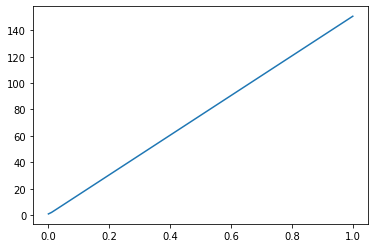

In [44]:
plt.plot(x, y)
plt.plot()

In [78]:
def call_imvol(premium, S, K, T, r):
    epsilon = bot = 0.000001
    top = 1.0
    diff = BS_functions.BS_call(S, K, T, top, r) - premium
    while diff <= 0:
        top += 1.0
        diff = BS_functions.BS_call(S, K, T, top, r) - premium
    #count = 0
    while True:
        #count += 1
        h = (top+bot)/2
        diff = BS_functions.BS_call(S, K, T, h, r) - premium
        if abs(diff) <= epsilon:
            #return h, count
            return h
        if diff < 0:
            bot = h
        else:
            top = h

In [67]:
p = (34.4+35)/2

In [81]:
for p in np.linspace(30, 35, 10):
    print(call_imvol(p, S, K, tau, rf_rate))

(0.19672678272138533, 26)
(0.20042365280857677, 25)
(0.20412052289576824, 26)
(0.20781737808181347, 26)
(0.21151424816900494, 24)
(0.2152111033550501, 23)
(0.21890795854109524, 24)
(0.22260481372714042, 22)
(0.2263016689131856, 24)
(0.22999852409923074, 23)


In [13]:
call = sp500.option_chain()[0]

In [10]:
sp500.options

('2021-12-17',)

In [11]:
sp500.option_chain('2021-12-17')

Options(calls=        contractSymbol       lastTradeDate  strike  lastPrice     bid     ask  \
0   SPX211217C00900000 2020-12-09 14:30:02   900.0    2755.29  2857.8  2884.2   
1   SPX211217C01000000 2021-05-13 19:44:10  1000.0    3096.85  3137.3  3149.9   
2   SPX211217C01225000 2021-02-04 15:15:53  1225.0    2585.33     0.0     0.0   
3   SPX211217C01300000 2020-08-20 18:32:34  1300.0    2039.26     0.0     0.0   
4   SPX211217C01375000 2020-11-12 16:13:32  1375.0    2143.78     0.0     0.0   
5   SPX211217C01400000 2021-03-11 17:03:20  1400.0    2489.80     0.0     0.0   
6   SPX211217C01500000 2021-04-05 16:23:57  1500.0    2543.68     0.0     0.0   
7   SPX211217C01525000 2020-07-09 20:56:33  1525.0    1425.66     0.0     0.0   
8   SPX211217C01550000 2020-07-09 20:56:33  1550.0    1201.50     0.0     0.0   
9   SPX211217C01600000 2020-07-28 15:46:50  1600.0    1600.80     0.0     0.0   
10  SPX211217C01625000 2020-07-09 20:56:33  1625.0    1375.00  1676.0  1681.6   
11  SPX211217C

In [8]:
call

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPX211217C00900000,2020-12-09 14:30:02,900.0,2755.29,2857.8,2884.2,0.000000,0.00000,1,1807,0.000010,True,REGULAR,USD
1,SPX211217C01000000,2021-05-13 19:44:10,1000.0,3096.85,3136.1,3149.2,0.000000,0.00000,500,17267,0.000010,True,REGULAR,USD
2,SPX211217C01225000,2021-02-04 15:15:53,1225.0,2585.33,0.0,0.0,0.000000,0.00000,1,11,0.000010,True,REGULAR,USD
3,SPX211217C01300000,2020-08-20 18:32:34,1300.0,2039.26,0.0,0.0,0.000000,0.00000,1,21,0.000010,True,REGULAR,USD
4,SPX211217C01375000,2020-11-12 16:13:32,1375.0,2143.78,0.0,0.0,0.000000,0.00000,15,6,0.000010,True,REGULAR,USD
5,SPX211217C01400000,2021-03-11 17:03:20,1400.0,2489.80,0.0,0.0,0.000000,0.00000,11,18,0.000010,True,REGULAR,USD
6,SPX211217C01500000,2021-04-05 16:23:57,1500.0,2543.68,0.0,0.0,0.000000,0.00000,1,88,0.000010,True,REGULAR,USD
7,SPX211217C01525000,2020-07-09 20:56:33,1525.0,1425.66,0.0,0.0,0.000000,0.00000,3,9,0.000010,True,REGULAR,USD
8,SPX211217C01550000,2020-07-09 20:56:33,1550.0,1201.50,0.0,0.0,0.000000,0.00000,0,9,0.000010,True,REGULAR,USD
9,SPX211217C01600000,2020-07-28 15:46:50,1600.0,1600.80,0.0,0.0,0.000000,0.00000,2,60,0.000010,True,REGULAR,USD


In [27]:
t_df = pdr.DataReader('DTB3', 'fred', start='2021-05-01')

In [28]:
t_df.to_hdf("./data/TBILL_d210606.h5", 'df')

In [29]:
t_df.iloc[-1].item()

0.01